In [1]:
import numpy as np

In [89]:
m = 100
X = 6 * np.random.rand(m,1) - 3

In [3]:
X

array([[ 0.27291671],
       [ 0.93829684],
       [ 1.49043304],
       [ 2.95078142],
       [-2.50321409],
       [ 0.52358489],
       [-1.21889189],
       [-1.57470302],
       [-2.18917298],
       [ 1.88116919],
       [ 1.49579633],
       [ 0.12768219],
       [ 0.43988091],
       [ 2.63591838],
       [-0.77417953],
       [ 0.28146464],
       [-2.39807747],
       [ 1.07428535],
       [ 1.36849148],
       [-0.18317202],
       [-1.11675357],
       [ 1.57574376],
       [-0.99561826],
       [-0.16115925],
       [ 0.49401774],
       [-0.27275508],
       [ 1.81041598],
       [-2.08675294],
       [-2.9374397 ],
       [ 2.38914537],
       [ 0.24444753],
       [-1.9619658 ],
       [ 0.29785536],
       [-1.67755051],
       [-2.32388931],
       [-0.74495579],
       [-1.6903763 ],
       [ 1.14404257],
       [-0.07674416],
       [ 0.61718304],
       [-1.68360885],
       [ 1.4306133 ],
       [-2.19598927],
       [-0.36483394],
       [ 0.90460443],
       [-0

In [90]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [5]:
import matplotlib.pyplot as plt

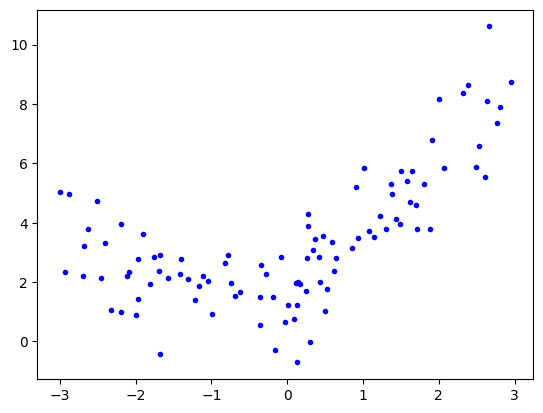

In [6]:
plt.plot(X, y, "b.")

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_features = PolynomialFeatures(degree = 2,  include_bias = False)

In [17]:
X_poly = poly_features.fit_transform(X)

In [18]:
X[0]

array([0.27291671])

In [19]:
X_poly[0]

array([0.27291671, 0.07448353])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [23]:
lin_reg.intercept_, lin_reg.coef_

(array([2.04472469]), array([[0.90369594, 0.51262361]]))

In [29]:
lin_reg.coef_[:,0]

array([0.90369594])

[]

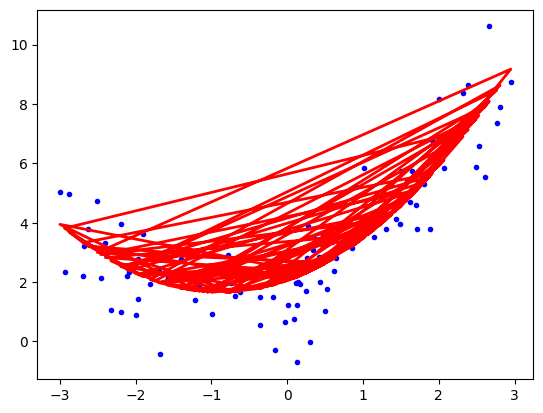

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth = 2)
plt.plot()



If your x-values (the values on the horizontal axis) are not in ascending order, the plotting function will connect the dots in the order they are provided.

[]

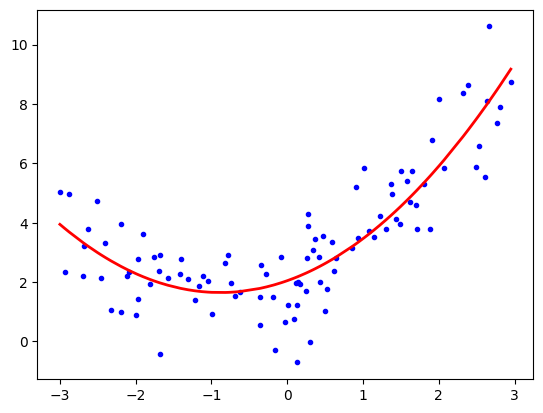

In [65]:
plt.plot(X, y, "b.")
y_pred = lin_reg.coef_[:,1]*np.sort(X,axis = 0)**2 + lin_reg.coef_[:,0]*np.sort(X,axis = 0) + lin_reg.intercept_
plt.plot(np.sort(X,axis = 0), y_pred, "r-", linewidth = 2)
plt.plot()

In [49]:
x_new = np.linspace(-3, 3, 100).reshape(100,1)

In [58]:
x_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [50]:
x_new_poly = poly_features.transform(x_new)

In [52]:
y_new = lin_reg.predict(x_new_poly)

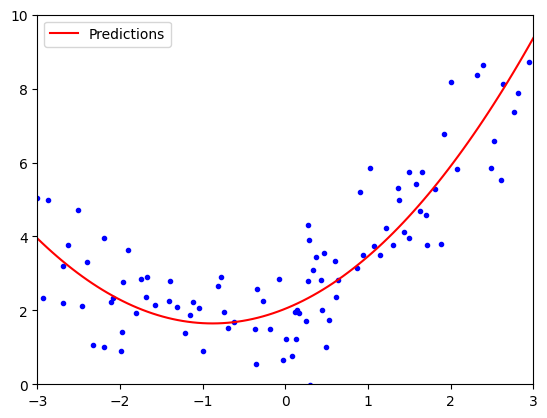

In [56]:
plt.plot(X, y, "b.")
plt.plot(x_new, y_new, "r", label = "Predictions")
plt.axis((-3,3, 0, 10))
plt.legend(loc="best")

In [63]:
X_sorted = np.sort(X, axis = 0)

In [64]:
X_sorted

array([[-2.99850046],
       [-2.9374397 ],
       [-2.87650251],
       [-2.69023052],
       [-2.68680709],
       [-2.6274542 ],
       [-2.50321409],
       [-2.46161036],
       [-2.39807747],
       [-2.32388931],
       [-2.19598927],
       [-2.18917298],
       [-2.1132231 ],
       [-2.08675294],
       [-1.99321334],
       [-1.97011325],
       [-1.9619658 ],
       [-1.90186434],
       [-1.80768397],
       [-1.75052162],
       [-1.6903763 ],
       [-1.68360885],
       [-1.67755051],
       [-1.57470302],
       [-1.40917063],
       [-1.39937758],
       [-1.30603848],
       [-1.21889189],
       [-1.15849553],
       [-1.11675357],
       [-1.04539831],
       [-0.99561826],
       [-0.81478539],
       [-0.77417953],
       [-0.74495579],
       [-0.68920129],
       [-0.61751952],
       [-0.36483394],
       [-0.35393937],
       [-0.34563995],
       [-0.27275508],
       [-0.18317202],
       [-0.16115925],
       [-0.07674416],
       [-0.03254872],
       [ 0

# Learning Curves

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
from sklearn.model_selection import train_test_split

In [100]:
def plot_learning_curves(model, X, y, **kwargs ):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend(loc="best")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")

    if kwargs:
        axes = kwargs["axis"]
        plt.axis(axes)

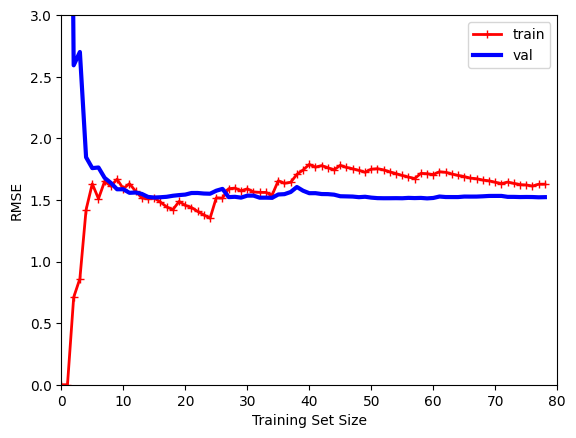

In [105]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, axis = [0, 80, 0.0, 3.0])

In [103]:
from sklearn.pipeline import Pipeline

In [87]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

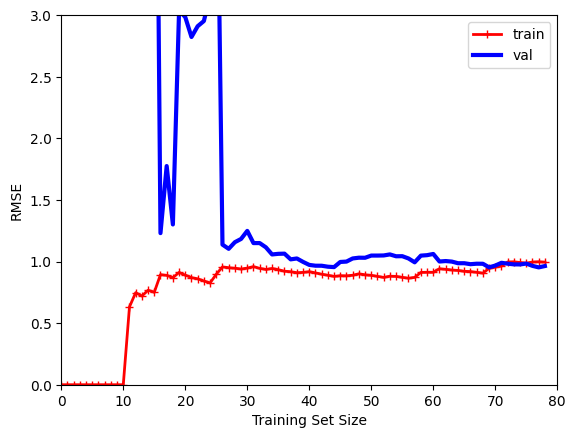

In [106]:
plot_learning_curves(polynomial_regression, X, y, axis = [0, 80, 0.0, 3.0])